# Lecture 24: The Normal Curve

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units ##

In [2]:
births = Table.read_table("baby.csv")
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

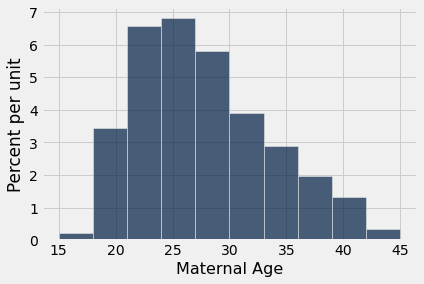

In [3]:
births.hist("Maternal Age")

In [4]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [5]:
ages = births.column('Maternal Age')

In [6]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [7]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [8]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years | Age in Standard Units
27           | -0.0392546
33           | 0.992496
28           | 0.132704
23           | -0.727088
25           | -0.383171
33           | 0.992496
23           | -0.727088
25           | -0.383171
30           | 0.476621
27           | -0.0392546
... (1164 rows omitted)

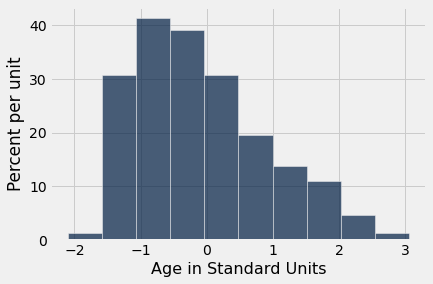

In [9]:
both.hist("Age in Standard Units")

**Back to slides.**

In [10]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

## The SD and Bell Shaped Curves ##

In [11]:
heights = births.column('Maternal Height')

In [12]:
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [13]:
sd_height = np.round(np.std(heights),1)
sd_height

2.5

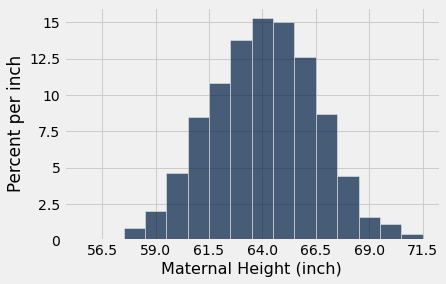

In [14]:
births.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit="inch")
positions = np.arange(-3, 3+1, 1) * sd_height + mean_height
plots.xticks(positions);

**Back to slides.**

## Normal Distributions ##

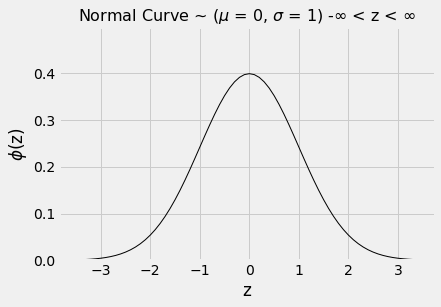

In [15]:
plot_normal_cdf()

In [16]:
from scipy import stats

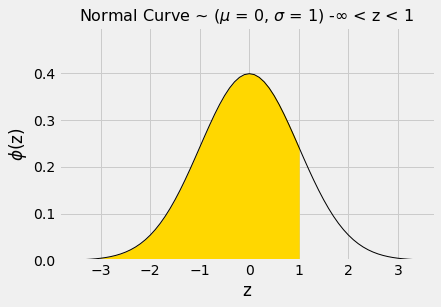

In [17]:
### The cumulative distribution function (cdf) for a normal distribution

plot_normal_cdf(1)

In [18]:
stats.norm.cdf(1)

0.8413447460685429

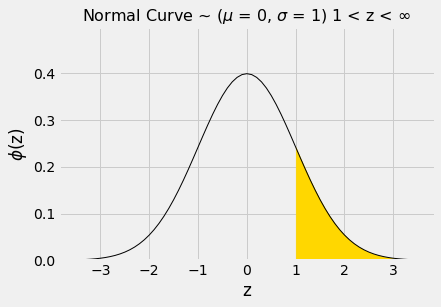

In [19]:
plot_normal_cdf(lbound=1)

In [20]:
1 - stats.norm.cdf(1)

0.15865525393145707

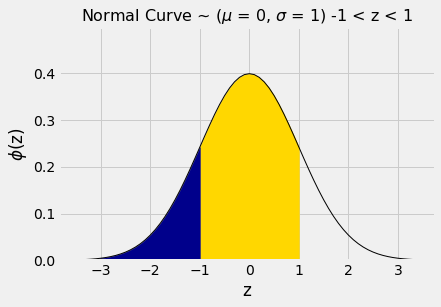

In [21]:
plot_normal_cdf(1,lbound=-1)

In [22]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [23]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [24]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

**Back to slides.**

## Normal from Sample Sums and Means ##

In [25]:
wheel = Table.read_table("roulette_wheel.csv")
wheel

Pocket | Color
0      | green
0      | green
1      | red
2      | black
3      | red
4      | black
5      | red
6      | black
7      | red
8      | black
... (28 rows omitted)

In [26]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1    

red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )

In [27]:
red.show()

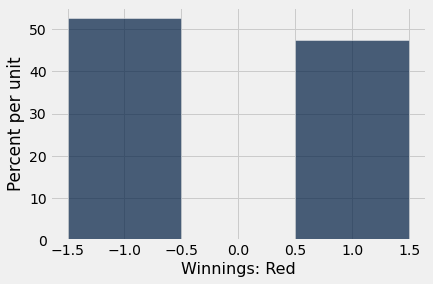

In [28]:
red.hist('Winnings: Red', bins = np.arange(-1.5, 1.6, 1))

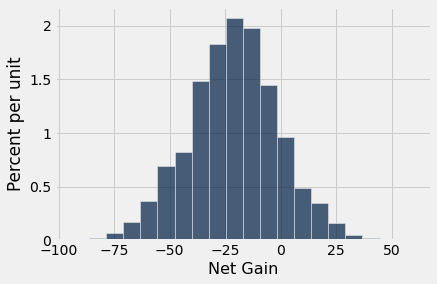

In [29]:
num_bets = 400
repetitions = 10000

net_gains = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    net = sum(spins.column('Winnings: Red'))
    net_gains = np.append(net_gains, net)
    
Table().with_columns('Net Gain', net_gains).hist(bins=20)

In [30]:
np.mean(net_gains)

-21.1512

In [31]:
np.std(net_gains)

20.227178215460505

In [32]:
united = Table.read_table('united_summer2015.csv')
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13815 rows omitted)

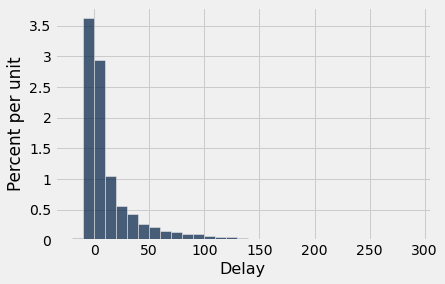

In [33]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [34]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

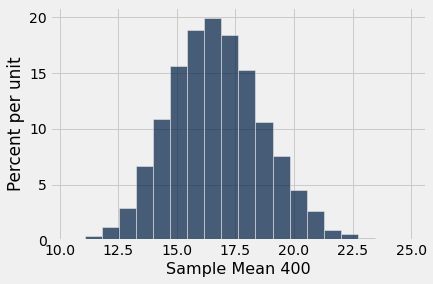

In [35]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
flight_delay = Table().with_columns('Sample Mean 400', means)
flight_delay.hist(bins = 20)

In [36]:
flight_delay

Sample Mean 400
17.685
14.305
13.6125
14.6575
17.2525
15.1925
14.425
17.7925
17.11
18.865
... (9990 rows omitted)

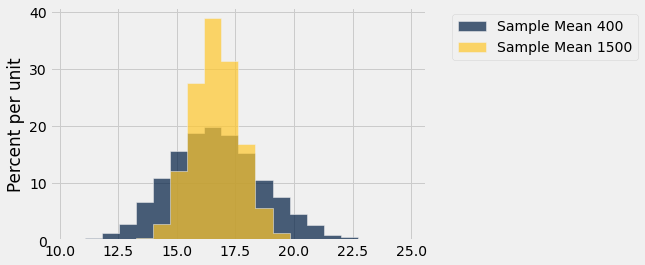

In [37]:
sample_size = 1500
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
flight_delay.with_column('Sample Mean 1500', means).hist(bins = 20)

In [38]:
# Create table to represent population
peas = Table().with_columns(
    'color', make_array('Purple', 'White'),
    'chance', make_array(.75, .25)
)
peas

color  | chance
Purple | 0.75
White  | 0.25

In [39]:
def proportion_purple(sample):
    return np.sum(sample == 'Purple') / len(sample)

In [40]:
# Create empty array to accumulate statistics
proportions = make_array()

# "Tuning knobs" for simulation
repetitions = 10000
sample_size = 200

for i in np.arange(repetitions):
    sample = peas.sample(sample_size, weights=peas.column('chance')).column('color')
    statistic = proportion_purple(sample)
    proportions = np.append(proportions, statistic)

proportions

array([0.735, 0.79 , 0.74 , ..., 0.72 , 0.765, 0.78 ])

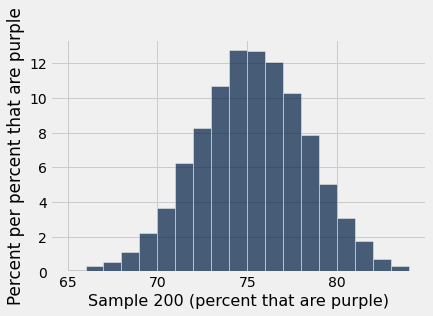

In [41]:
percents = Table().with_column('Sample 200', proportions * 100)
percents.hist(bins=np.arange(65, 85, 1), unit='percent that are purple')

In [42]:
# Create empty array to accumulate statistics
proportions2 = make_array()

# "Tuning knobs" for simulation
repetitions = 10000
sample_size = 1000

for i in np.arange(repetitions):
    sample = peas.sample(sample_size, weights=peas.column('chance')).column('color')
    statistic = proportion_purple(sample)
    proportions2 = np.append(proportions2, statistic)

proportions2

array([0.754, 0.755, 0.751, ..., 0.723, 0.749, 0.76 ])

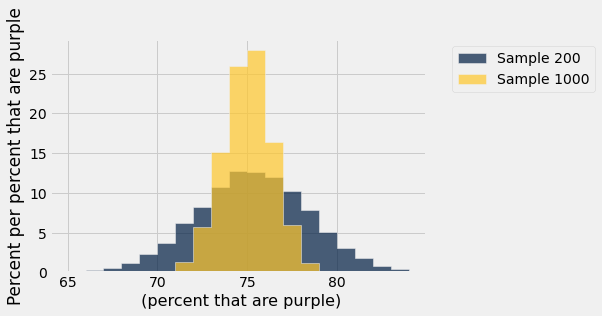

In [43]:
percents2 = percents.with_column('Sample 1000', proportions2 * 100)
percents2.hist(bins=np.arange(65, 85, 1), unit='percent that are purple')